In [20]:
from google.colab import drive
drive.mount('/mnist')

Drive already mounted at /mnist; to attempt to forcibly remount, call drive.mount("/mnist", force_remount=True).


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.datasets as datasets
from torch import nn

In [22]:
mnist_data = datasets.MNIST('./data', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize((0.1307,), (0.3081,))]))

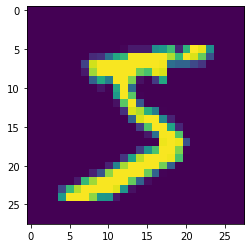

In [23]:
plt.imshow(mnist_data[0][0].numpy().squeeze())

In [24]:
mnist_test = datasets.MNIST('./data', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize((0.1307,), (0.3081,))]))

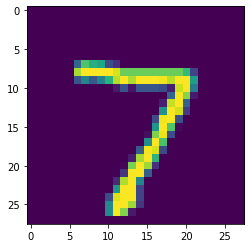

In [25]:
plt.imshow(mnist_test[0][0].numpy().squeeze())

In [26]:
n_epochs = 3
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1
torch.manual_seed(random_seed)

In [27]:
train_loader = torch.utils.data.DataLoader(mnist_data, batch_size=batch_size_train, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size_test)

In [28]:
class Flatten(nn.Module):
    def forward(self, input):
        return input.view(input.size(0), -1)

In [29]:
class net(nn.Module):
    def __init__(self):
        super(net, self).__init__()
        self.linear1 = nn.Linear(784, 100)
        self.linear2 = nn.Linear(100, 20)
        self.linear3 = nn.Linear(20,10)
        self.relu = nn.ReLU()
        self.flatten = Flatten()
        
    def forward(self, x):
        x = self.flatten(x)
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        x = self.relu(x)
        x = self.linear3(x)
        return x

In [30]:
network = net()
optimizer = torch.optim.SGD(network.parameters(), lr=learning_rate,
                      momentum=momentum)


In [31]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

In [36]:
def train(epoch):
    network.train()
    crossent = nn.CrossEntropyLoss()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = network(data)
        loss = crossent(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            train_losses.append(loss.item())
            train_counter.append(
                (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))

In [37]:
def test():
    crossent = nn.CrossEntropyLoss()
    network.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = network(data)
            test_loss += crossent(output, target).item()
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).sum()
    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)
    print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [38]:
asdasd = Flatten()

In [39]:
test()
for epoch in range(1, n_epochs + 1):
    train(epoch)
    test()


Test set: Avg. loss: 0.0023, Accuracy: 1019/10000 (10%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.323674
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.239339
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.152226
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.132253
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.038654
Train Epoch: 1 [3200/60000 (5%)]	Loss: 1.960921
Train Epoch: 1 [3840/60000 (6%)]	Loss: 1.878069
Train Epoch: 1 [4480/60000 (7%)]	Loss: 1.731705
Train Epoch: 1 [5120/60000 (9%)]	Loss: 1.558791
Train Epoch: 1 [5760/60000 (10%)]	Loss: 1.408082
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.308300
Train Epoch: 1 [7040/60000 (12%)]	Loss: 1.299557
Train Epoch: 1 [7680/60000 (13%)]	Loss: 1.036709
Train Epoch: 1 [8320/60000 (14%)]	Loss: 1.138999
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.816008
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.842717
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.730994
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.748595
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.701819
Train Epoch: 1 [12160

In [40]:
network.eval()

net(
  (linear1): Linear(in_features=784, out_features=100, bias=True)
  (linear2): Linear(in_features=100, out_features=20, bias=True)
  (linear3): Linear(in_features=20, out_features=10, bias=True)
  (relu): ReLU()
  (flatten): Flatten()
)

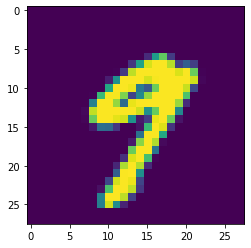

In [41]:
plt.imshow(mnist_test[20][0].squeeze())

In [42]:
network(mnist_test[20][0].unsqueeze(0)).argmax()

tensor(9)